In [109]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [110]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [111]:
#Part 1 
dfLE= dfLE.dropna(axis=0, inplace=False) # clean the data remove the NaN
dfLE['GDP_per_Capita']= (dfLE["GDP"]/ dfLE["Population"]) # colculate the value of GDP per Capita and add it in LE
dfLE[['Country','GDP_per_Capita']].sample(10).sort_index() # print 10 random rows of LE


,Country,GDP_per_Capita
18,Bhutan,1497.154333
24,Bulgaria,5490.517494
25,BurkinaFaso,396.575578
32,Chad,647.087031
65,Ghana,1101.246999
92,Latvia,10334.929688
94,Lesotho,778.046427
110,Mongolia,2113.183970
130,Paraguay,2306.960717
148,Senegal,209.408045


### Part 2: Print a visualization of each distribution. Both regular (density) ***'I use PDF for density'*** and cumulative  ***'I use CDF for  cumulative'***. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

***'I use PDF for density'***<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>

I will use def bigGraph to make our life ‘easy’, which means when you enter the data, 'bigGraph' be able to semi-automate print all the graphs and we don't do coding again.

In [112]:
#Print all distributions 
#should be able to semi-automate it
def bigGraph(df_in, columnName, hist_round, pmf_round): 
    # different data in 'dfLE' need different round in hist, pmf make graphs look nice
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,hist_round))
    pmf = thinkstats2.Pmf(round(data,pmf_round))
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

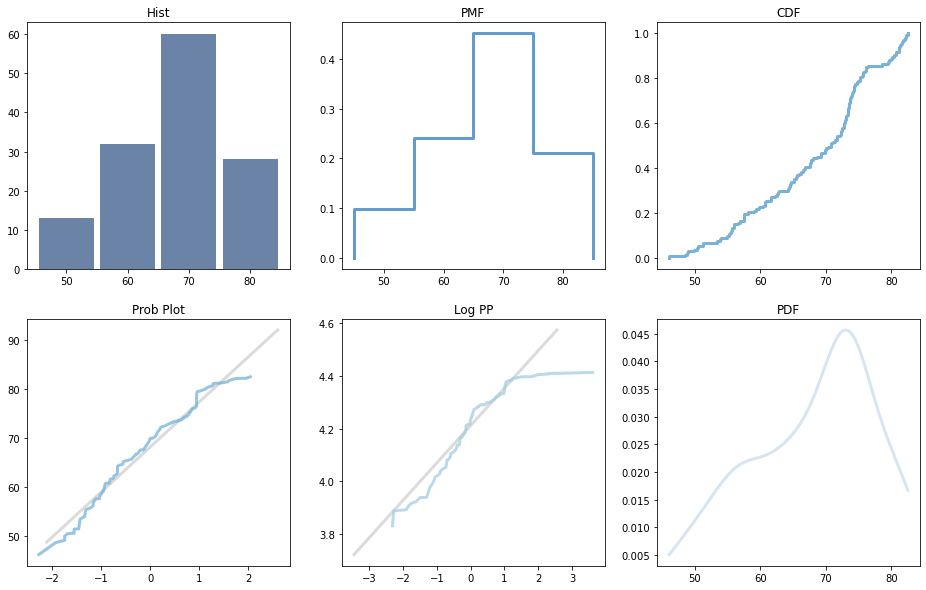

In [113]:
#Exmple 1: I use the 'Lifeexpectancy' in dfLE 
bigGraph(dfLE, 'Lifeexpectancy', -1 , -1)
#easy to tell the age of 70s has most population  

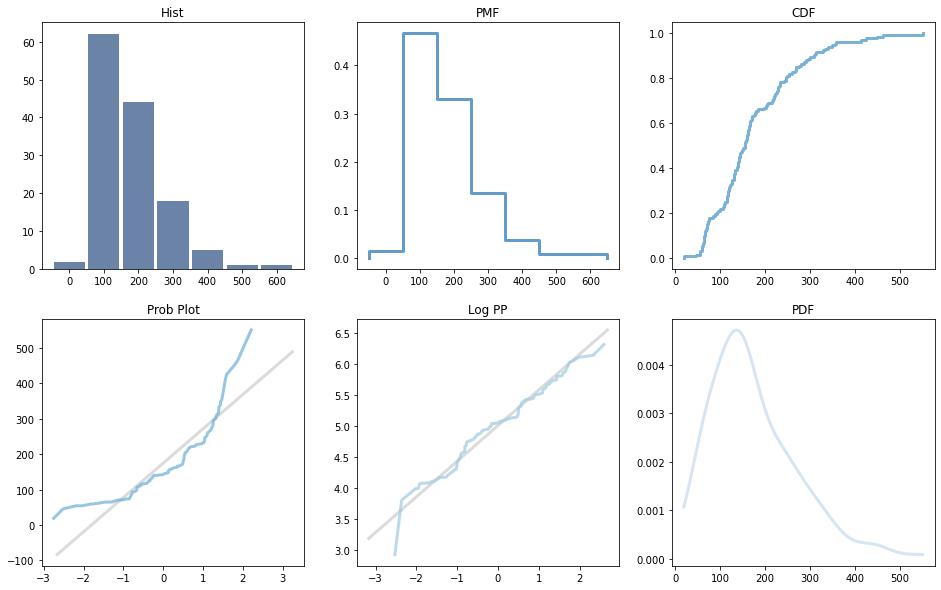

In [114]:
bigGraph(dfLE, 'AdultMortality', -2, -2)

e:\Tools\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\NAIT\One Drive\OneDrive - NAIT\Data 3450\Ass 2\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


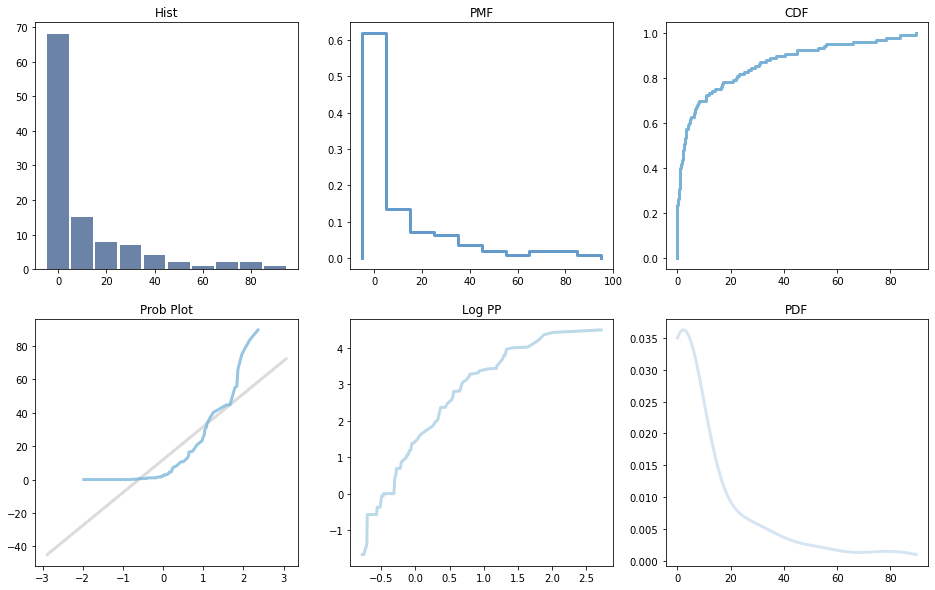

In [150]:
bigGraph(dfLE, 'infantdeaths', -1, -1 )

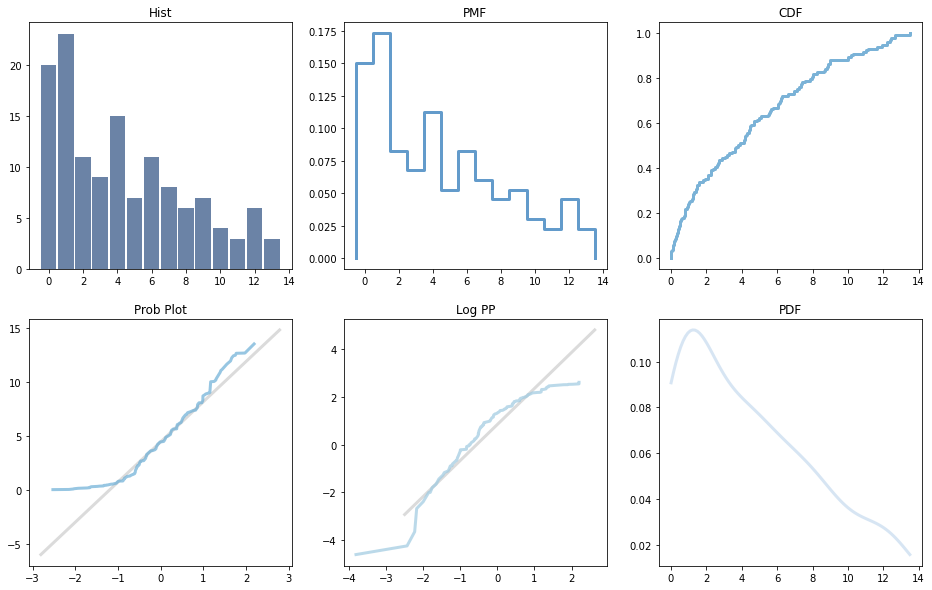

In [116]:
bigGraph(dfLE, 'Alcohol', 0, 0)

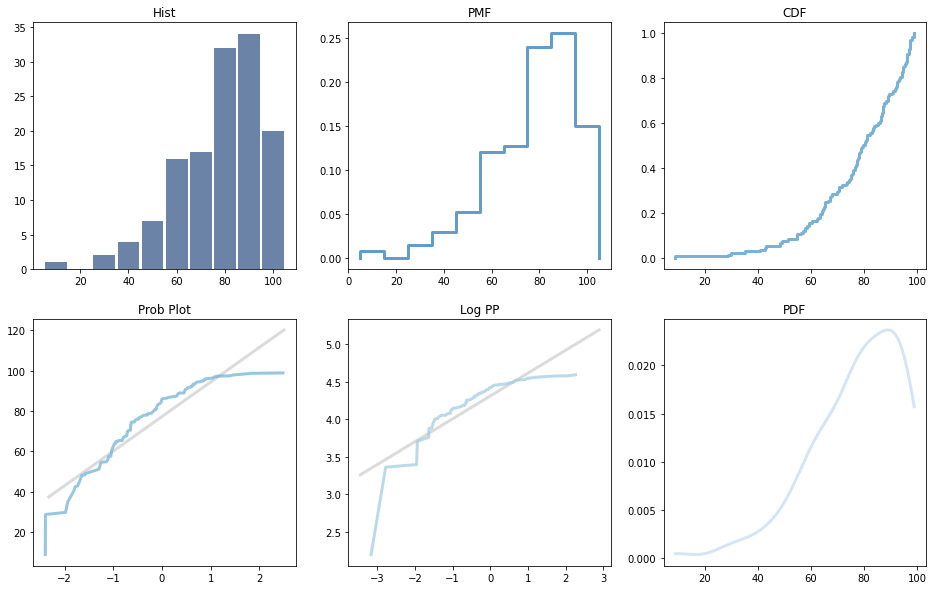

In [117]:
bigGraph(dfLE, 'HepatitisB', -1, -1)

e:\Tools\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\NAIT\One Drive\OneDrive - NAIT\Data 3450\Ass 2\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


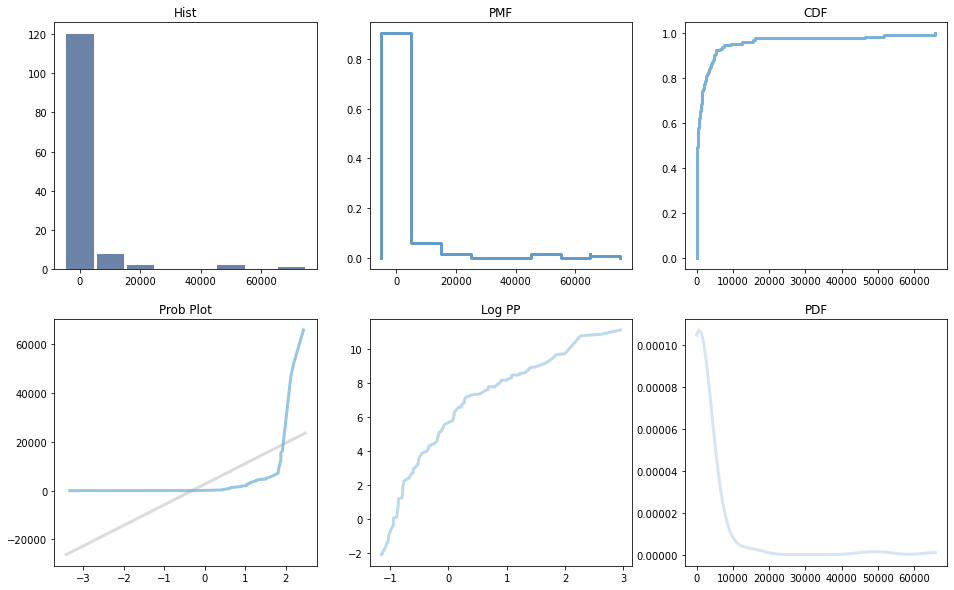

In [118]:
bigGraph(dfLE, 'Measles', -4, -4)

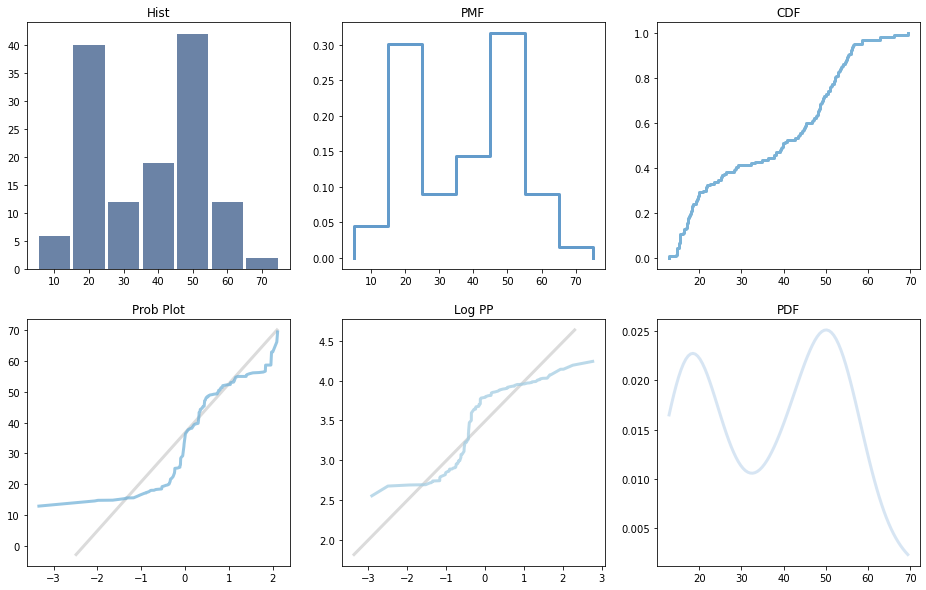

In [119]:
bigGraph(dfLE, 'BMI', -1, -1)

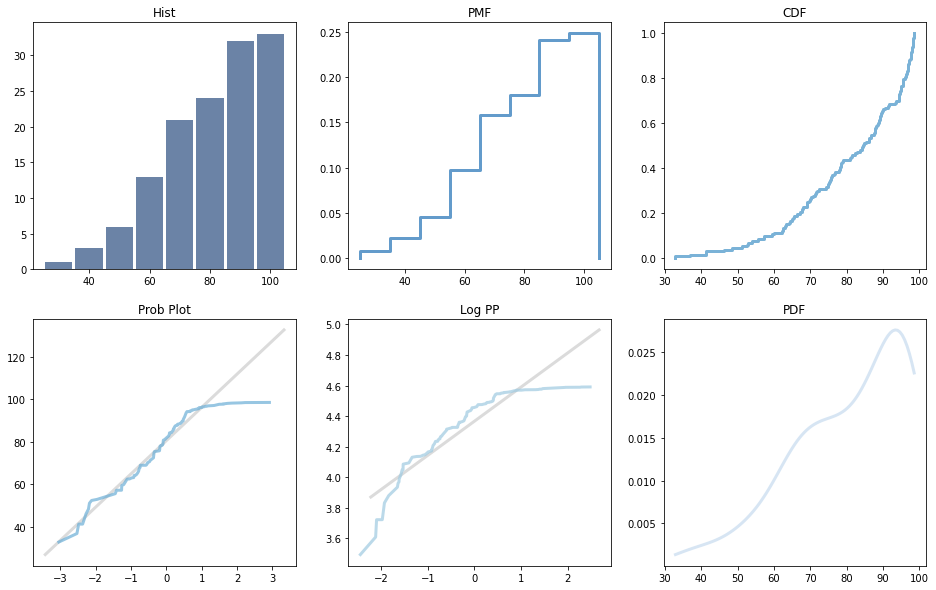

In [120]:
bigGraph(dfLE, 'Polio',-1, -1)

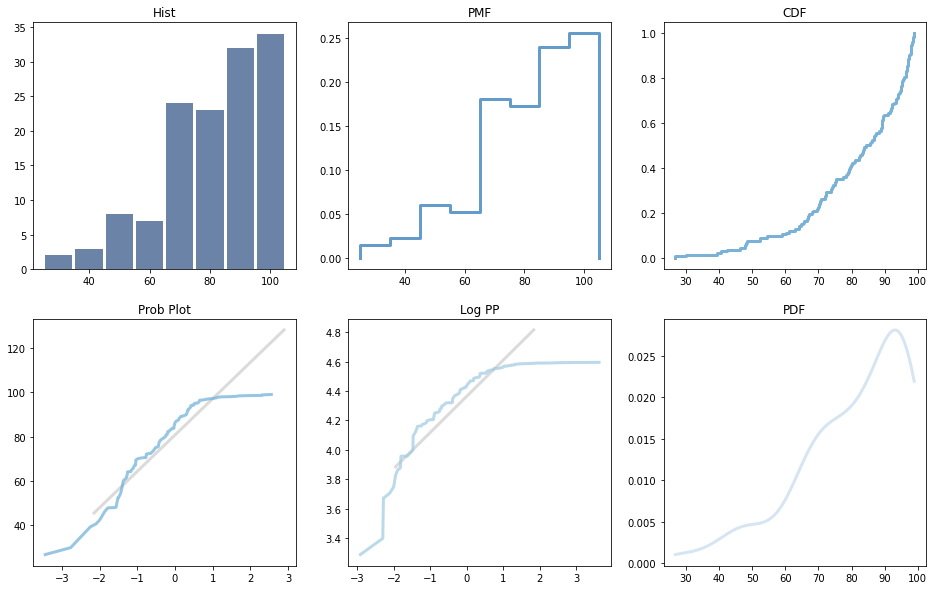

In [121]:
bigGraph(dfLE, 'Diphtheria', -1, -1)

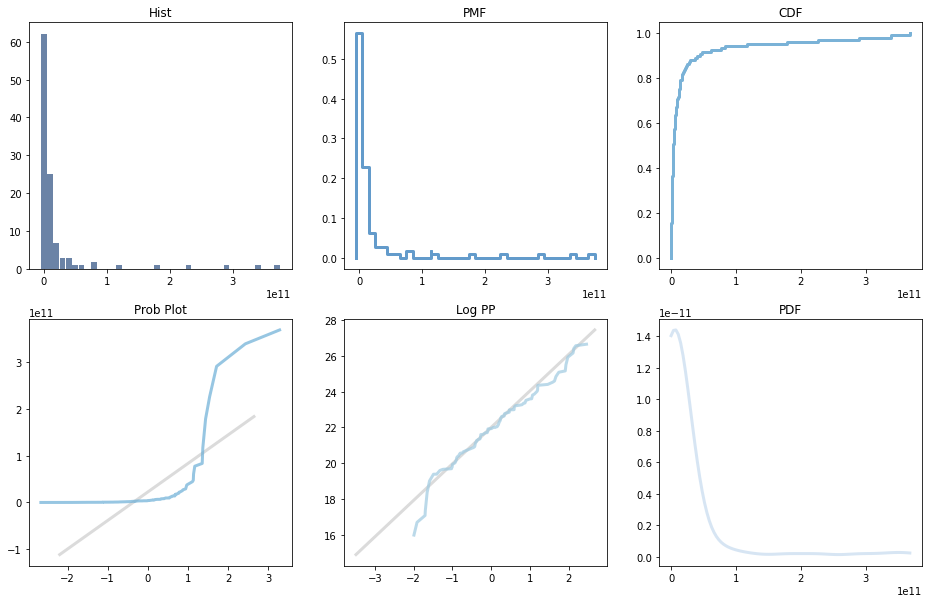

In [151]:
bigGraph(dfLE, 'GDP', -10, -10)

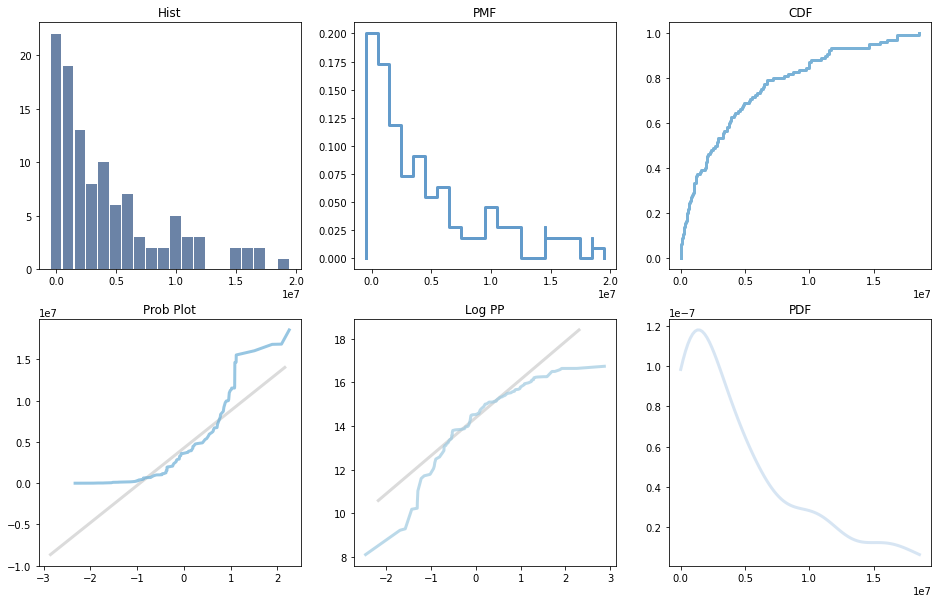

In [152]:
bigGraph(dfLE, 'Population', -6, -6)

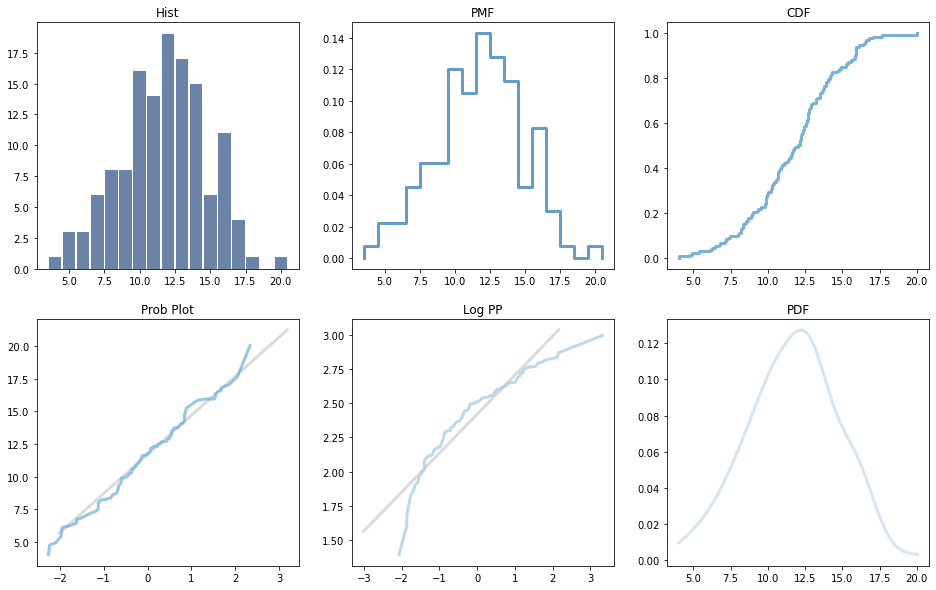

In [124]:
bigGraph(dfLE, 'Schooling', 0, 0)

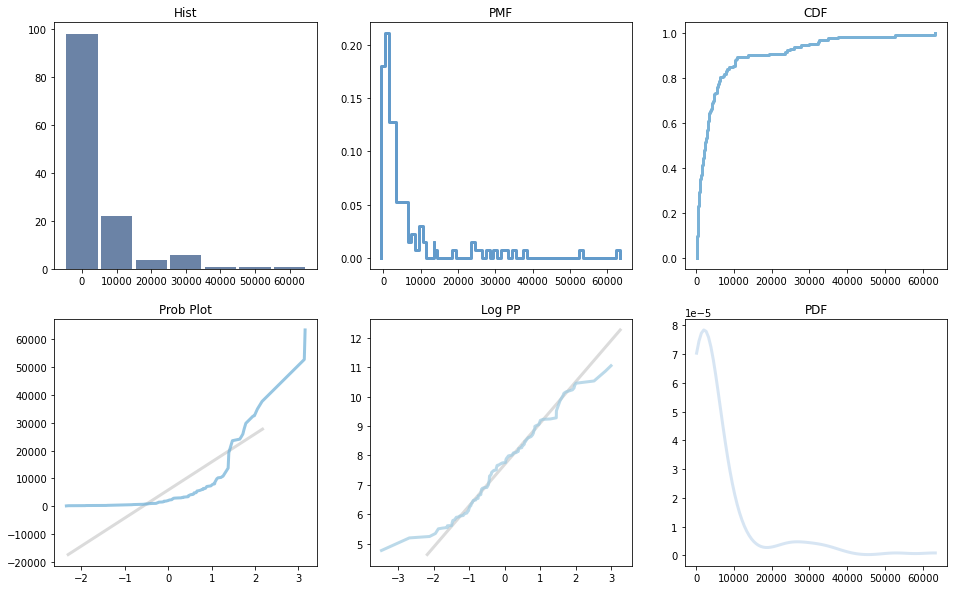

In [125]:
bigGraph(dfLE, 'GDP_per_Capita', -4, -3)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

***#1 5 points are for choosing an appropriate distribution. Please state it clearly somewhere.***

In [126]:
dfLE['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

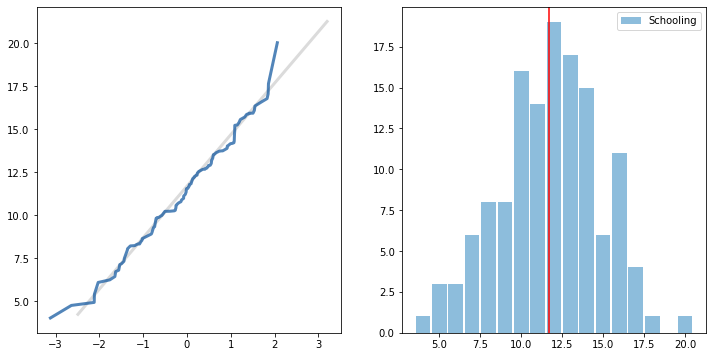

In [127]:
#Analytical for Schooling
hi = thinkstats2.Hist(round(dfLE['Schooling'],0), label="Schooling")
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)    
thinkstats2.NormalProbabilityPlot(dfLE['Schooling'])
thinkplot.SubPlot(2)
thinkplot.Hist(hi)
plt.axvline(dfLE['Schooling'].mean(), color="red")
thinkplot.Config()
#From the figure below, it looks like we have a normal distribution, so I need to verify further.

In [128]:
k2, p = ss.normaltest(dfLE['Schooling'])
print("The p value of 'Schooling' is: ", p)

The p value of 'Schooling' is:  0.8061408621435778


The p Value of 'Schooling' is 0.806, we can consider that we are within the cutoff for confidence of the normal distribution (p>0.05), so we can say the null hypothesis of 'Schooling' are normally distributed.

***#2 <li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution.*** 

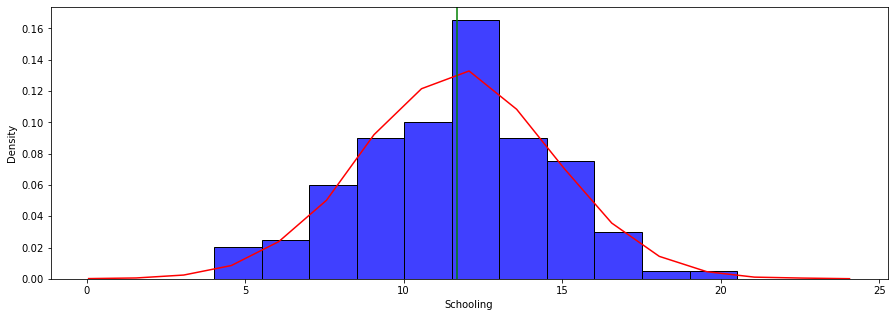

In [129]:
schooling_mu = dfLE["Schooling"].mean()
schooling_sigma = dfLE["Schooling"].std()
schooling_normies = ss.norm(schooling_mu,schooling_sigma)
sns.histplot(data=schooling_normies.rvs(10000), binwidth=1.5, color="red", stat="density", element="poly", fill=False)
sns.histplot(data=dfLE["Schooling"], binwidth=1.5, color="blue", stat="density")
plt.axvline(schooling_mu, color="green")

***#3 <li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada.*** 

In [130]:
#Find Canada in the 'Country', and pull it out
Country_Canada=dfLE.index[dfLE["Country"] == "Canada"]
# use the Canada and 'schooling' make a new df called Canada_schooling
Canada_schooling=dfLE.loc[Country_Canada.values[0], "Schooling"]
print('Canadian spend' ,Canada_schooling, 'years in school.')
schooling_cdf = thinkstats2.Cdf(dfLE["Schooling"])
Canada_1year_percentage = schooling_cdf.PercentileRank(Canada_schooling + 0.5) - schooling_cdf.PercentileRank(Canada_schooling - 0.5) #0.5 from lowvol and 0.5 from highvol diff is 1
print("The percentage of the schooling level within 1 year of Canada is:", np.round(Canada_1year_percentage,2),"%")

Canadian spend 15.875 years in school.
The percentage of the schooling level within 1 year of Canada is: 9.02 %


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

***<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.***

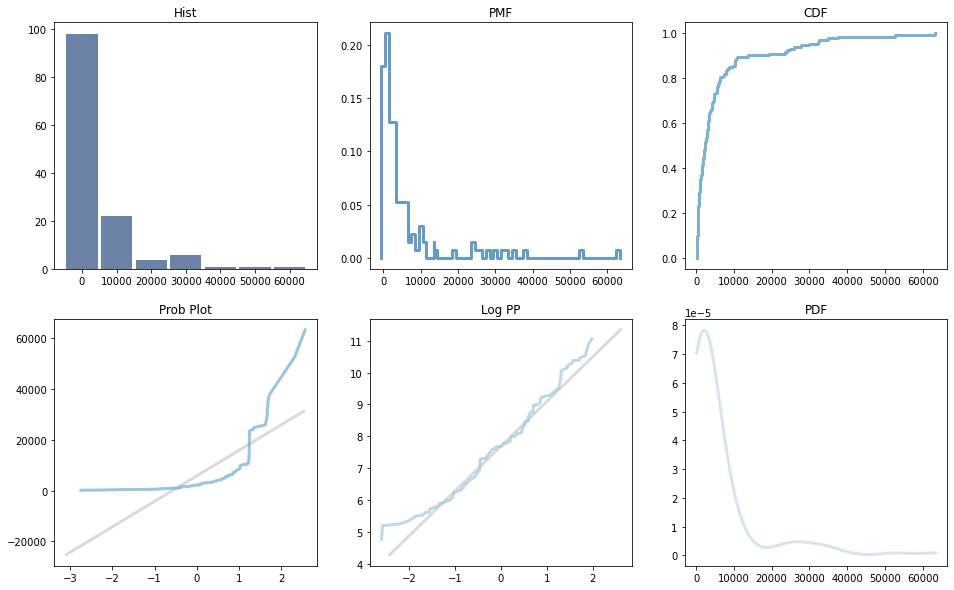

In [131]:
#Analytical for GDP/capita
bigGraph(dfLE, 'GDP_per_Capita', -4, -3) #use bigGraph faction get the 6 figures

***It looks like LogNormal Distribution
It is not difficult to see from the above 6 figures that it has the typical characteristics of 'LogNormal Distribution', the distributions look like a normal distribution where the peak is "squished" to the left.***

e:\Tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Density'>

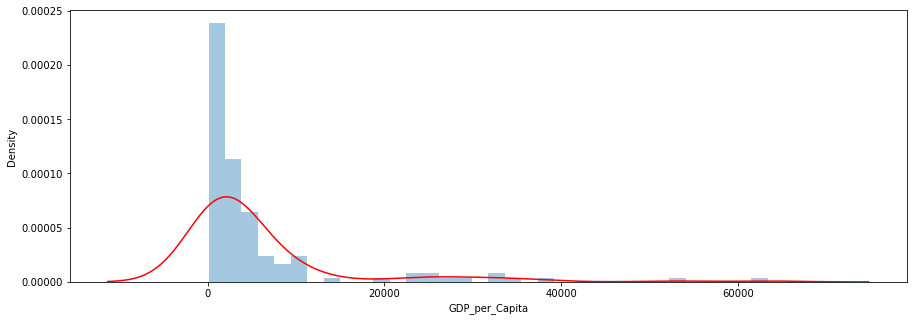

In [132]:
sns.distplot(dfLE['GDP_per_Capita'],kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"})

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Proportion'>

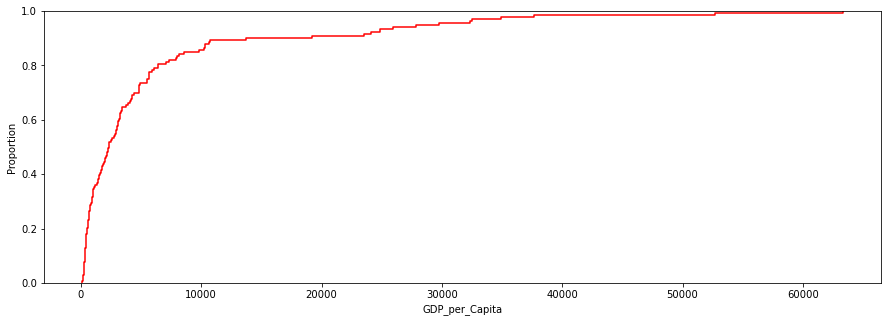

In [133]:
sns.ecdfplot(dfLE["GDP_per_Capita"], color="red")

***5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?***

In [134]:
df_groupby_GpC=dfLE[['Country','GDP_per_Capita']].groupby(by='GDP_per_Capita').min()
df_groupby_GpC.tail(5)

,Country
GDP_per_Capita,
32513.870092,Ireland
34897.075919,Austria
37660.648684,Netherlands
52725.125099,Luxembourg
63337.610450,Australia


***Yes, it appears accurate. Because from the following figure, GDP per Capita is mainly concentrated below $10,000, which indicates that the number of developing countries is very high. Of the 2 outliers, one is around $52000 and the other one is around $63000, indicating that some developed countries' GDP per Capita is very high. There is a huge GDP per capita gap among countries worldwide,today. (I did some research about GDP per capita in 2021 https://www.visualcapitalist.com/mapped-gdp-per-capita-worldwide/)***

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

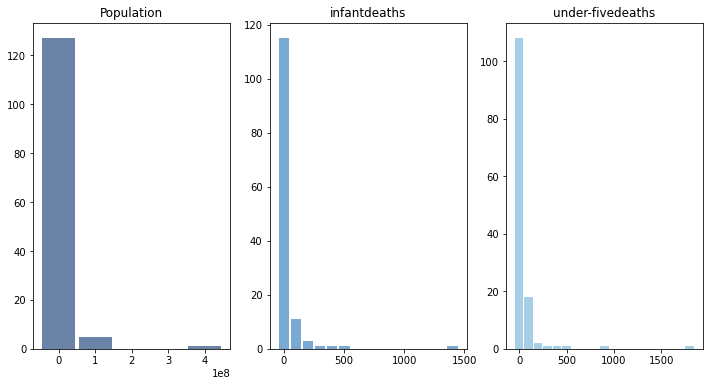

In [135]:
#Calculate correlations and analyze. 
# We want clean the filters first
thinkplot.PrePlot(3, rows =1, cols=3)
thinkplot.SubPlot(1, title="Population")
thinkplot.Hist(thinkstats2.Hist(round(dfLE["Population"],-8)))
thinkplot.SubPlot(2, title="infantdeaths")
thinkplot.Hist(thinkstats2.Hist(round(dfLE["infantdeaths"],-2)))
thinkplot.SubPlot(3, title="under-fivedeaths")
thinkplot.Hist(thinkstats2.Hist(round(dfLE["under-fivedeaths"],-2)))


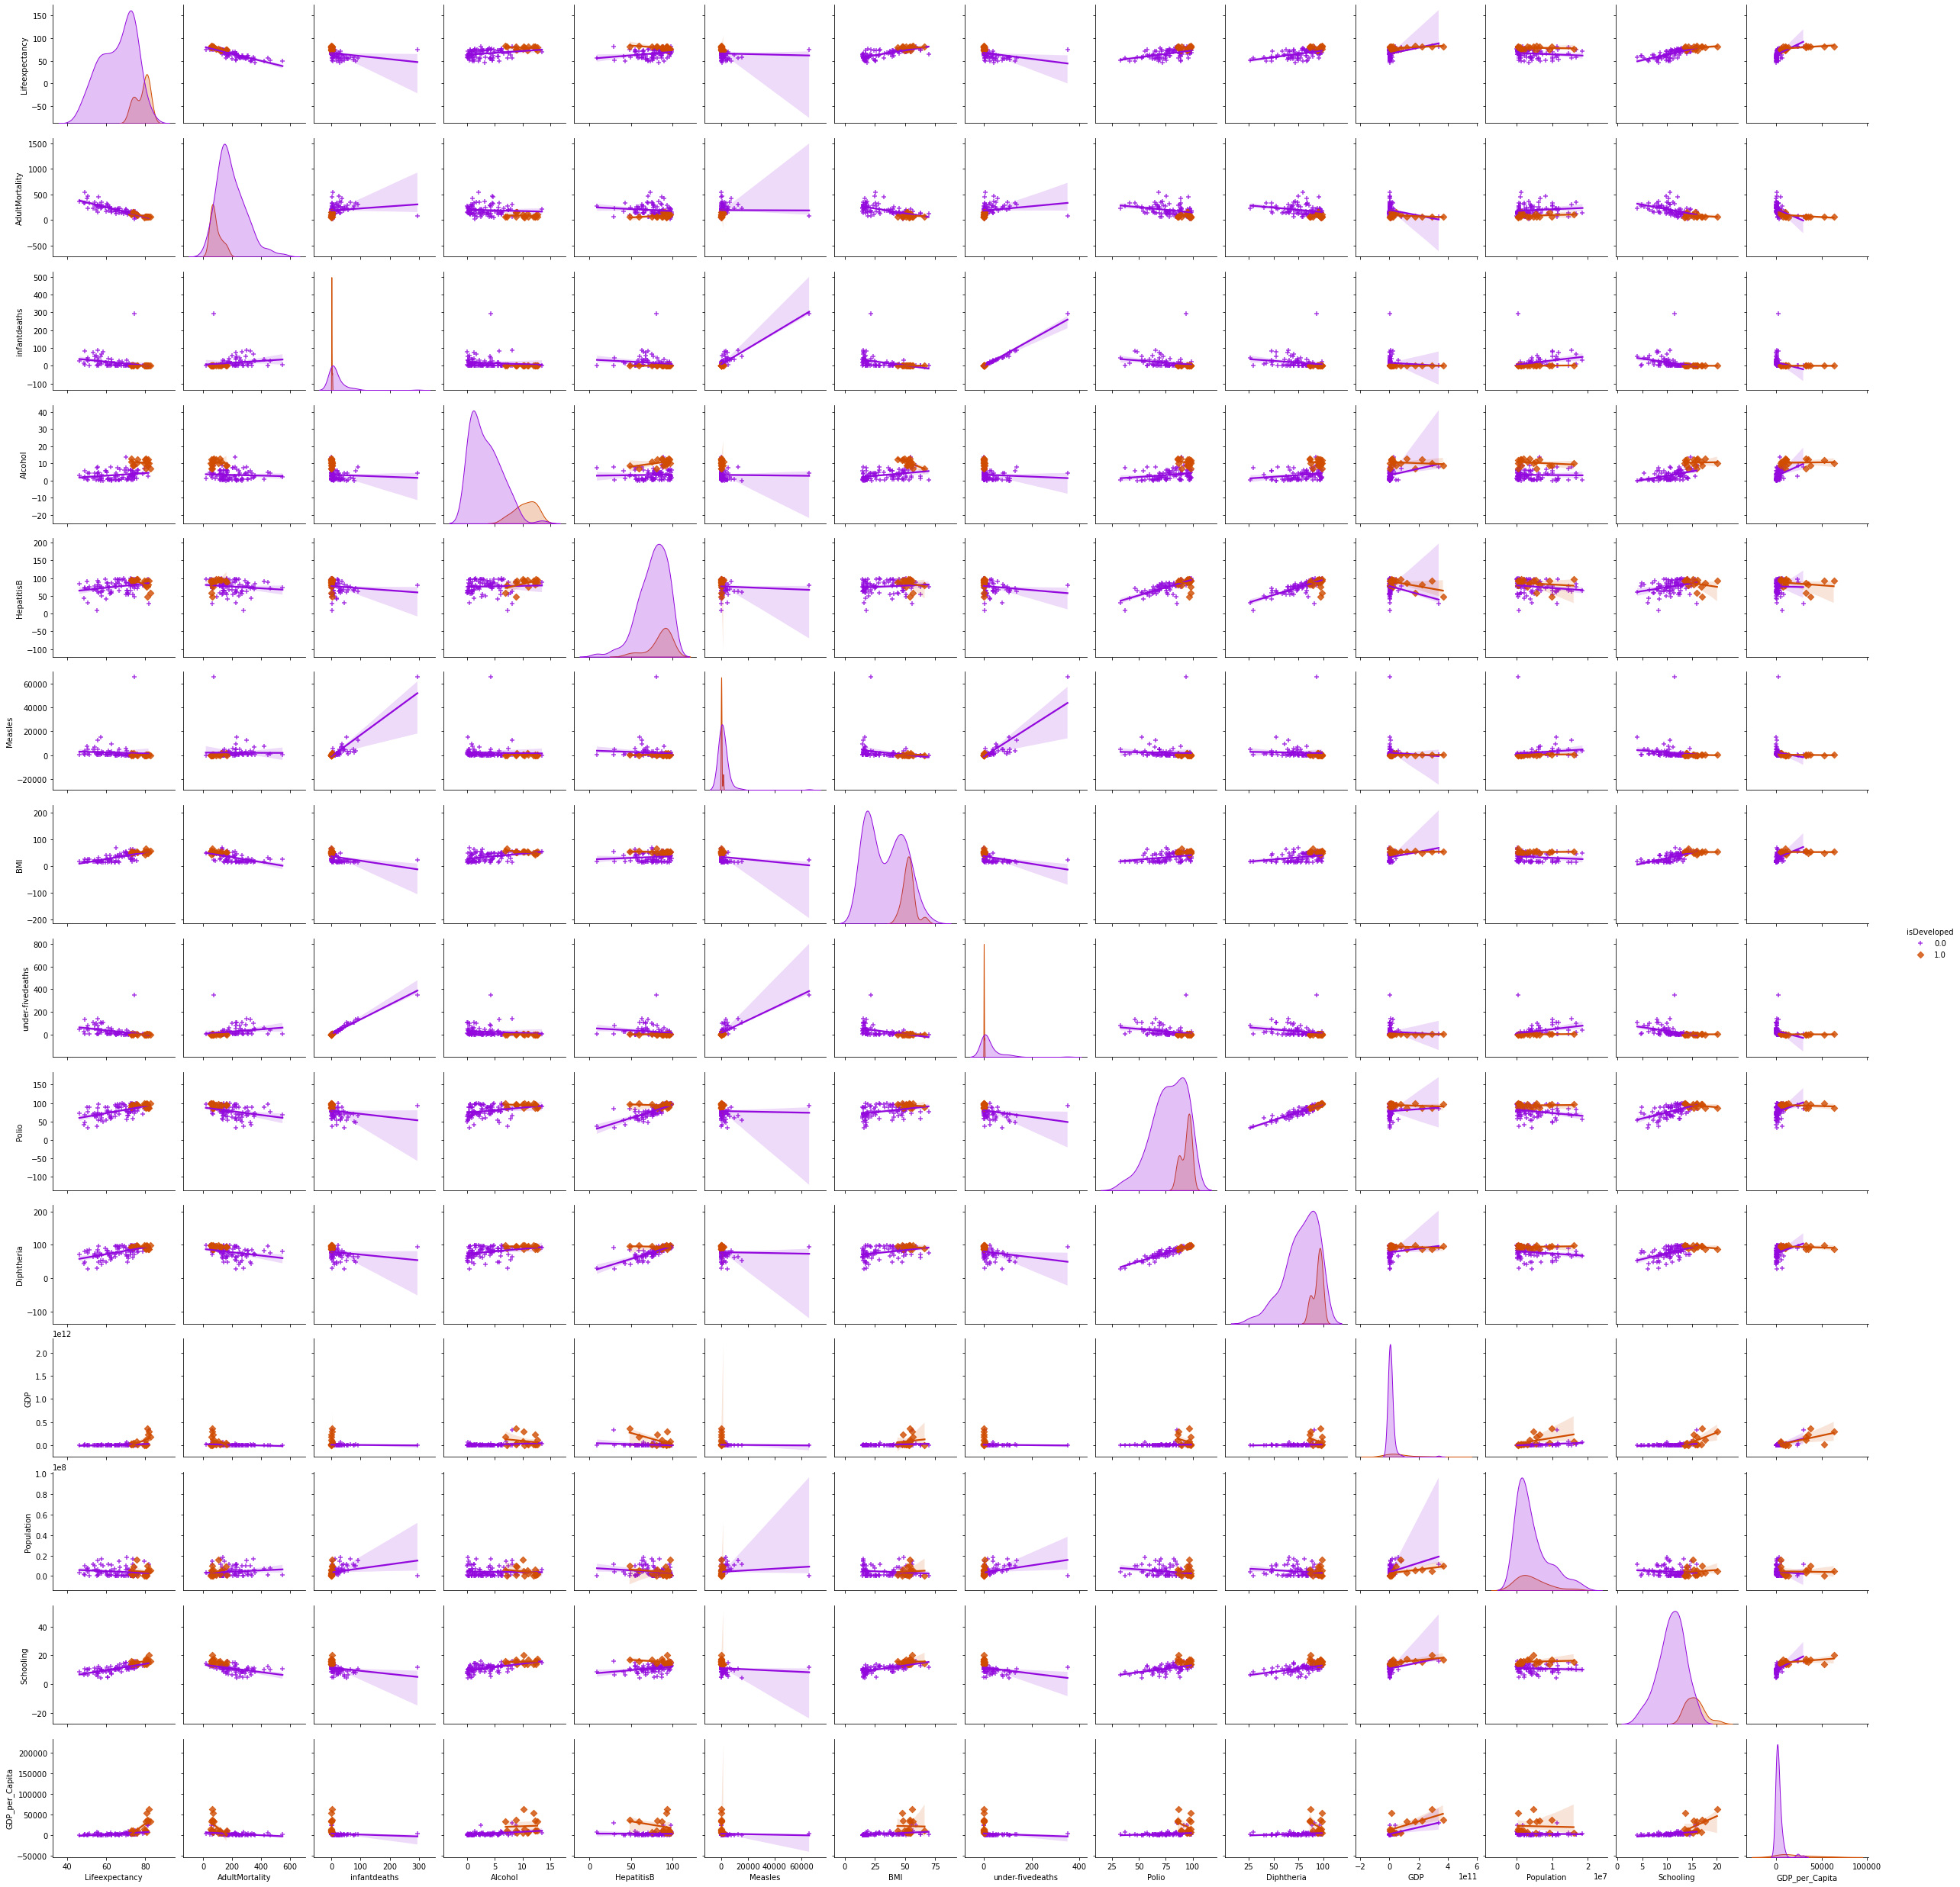

In [136]:
dfLE = dfLE[dfLE["Population"] < 20000000] # From Figure 1 above, the most population below 20,000,000 and there is a big gap between the filters
dfLE = dfLE[dfLE["infantdeaths"] < 600] # From Figure 2 above, the most infantdeaths below 600 and there is a big gap between the filters
dfLE = dfLE[dfLE["under-fivedeaths"] < 600] # From Figure 3 above, the most under-fivedeaths below 600 and there is a big gap between the filters

sns.pairplot(dfLE.drop(columns=["Country"]), kind="reg",diag_kind="kde",markers=["+", "D"], dropna=True, hue="isDeveloped", palette="gnuplot")
#also, we don't need the 'Country' because it's not numerical data.

#sns.color_palette("gnuplot"))

In [137]:
#drop 'Country', it's not numerical data.
tmp = dfLE.drop(columns=["Country"])
#split 'isDeveloped' as not developed, developed
tmp1_Not_Dev =tmp[tmp["isDeveloped"] == 0]
tmp2_Dev =tmp[tmp["isDeveloped"] == 1]

# The Heatmap of Not Developed correlations

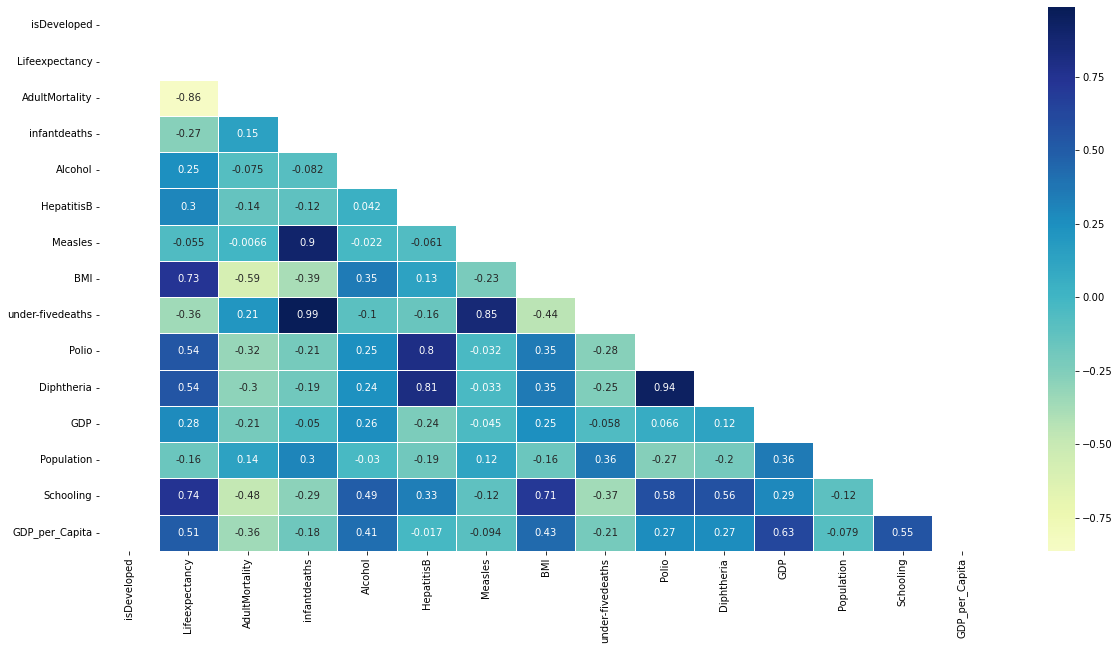

In [138]:
posCor1 = tmp1_Not_Dev.corr()
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(posCor1, dtype=bool))
sns.heatmap(posCor1, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

# The Heatmap of Developed correlations

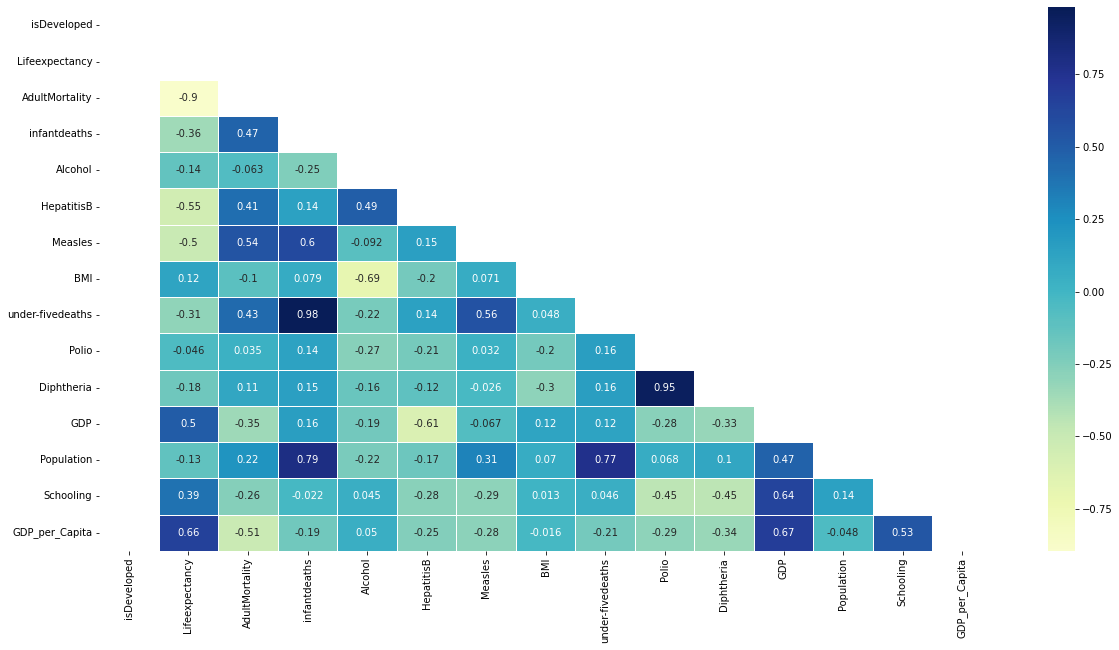

In [139]:
posCor2 = tmp2_Dev.corr()
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(posCor2, dtype=bool))
sns.heatmap(posCor2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [140]:
dfLE['isDeveloped'].value_counts() 

0.0    95
1.0    16
Name: isDeveloped, dtype: int64

we can see that developing countries are the majority, so we will focus on the heat map of developing countries.
The three highest associations are 'under-fivedeaths---infantdeaths',' Diphtheria---Polio', and 'Measles---infantdeaths'.
The under-fivedeaths include the infantdeaths, so we drop this correlations. 

<AxesSubplot:xlabel='Diphtheria', ylabel='Polio'>

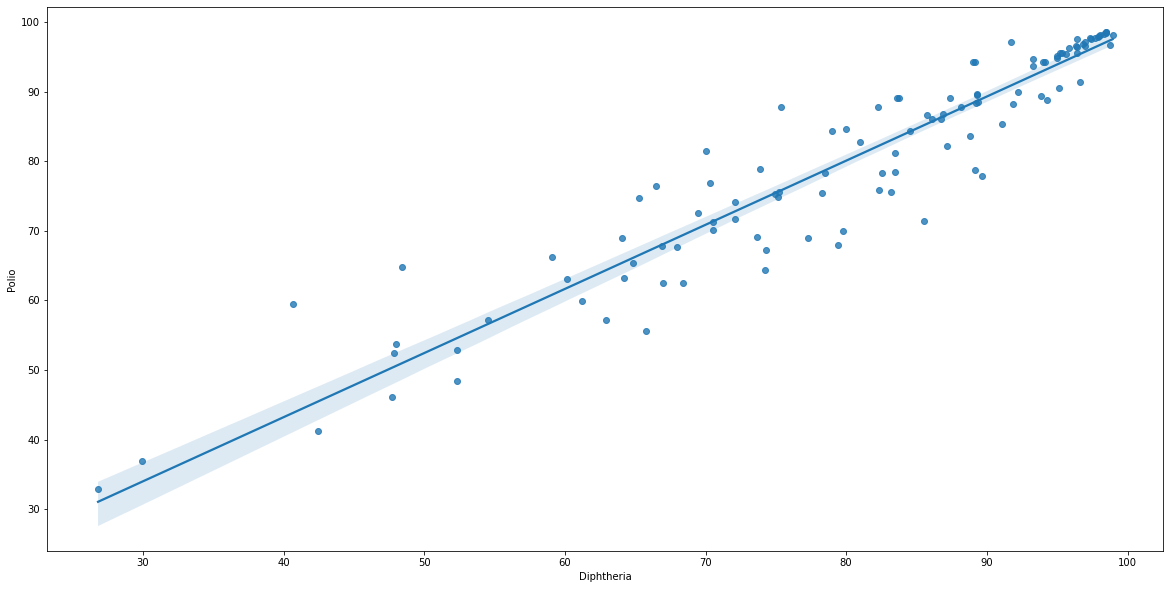

In [141]:
dfDipPol = dfLE[["Diphtheria","Polio" ]]
sns.regplot(x=dfDipPol["Diphtheria"], y=dfDipPol["Polio"], robust=True)

Because of the very high level of medical care in developed countries, the 'Measles--infantdeaths' correlations is not as strong as in developing countries
so I will drop the developed countries.

<AxesSubplot:xlabel='Measles', ylabel='infantdeaths'>

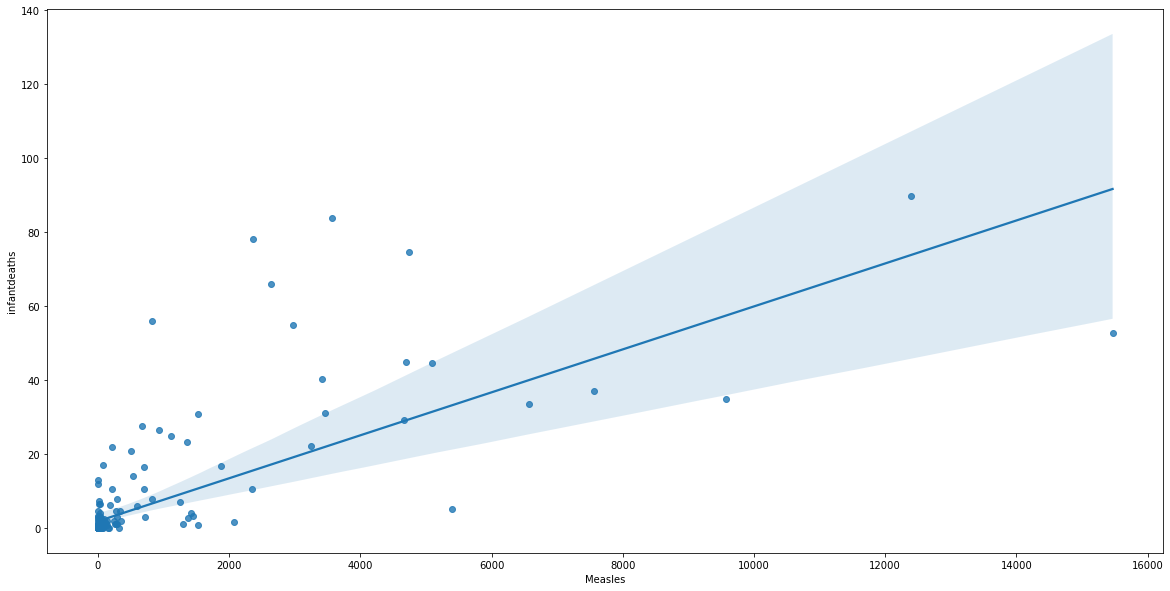

In [142]:
dfLE= dfLE[dfLE["Measles"]<20000]
dfMeainf = dfLE[["Measles","infantdeaths" ]]
sns.regplot(x=dfMeainf["Measles"], y=dfMeainf["infantdeaths"], robust=True)

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

#1 5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 

<AxesSubplot:>

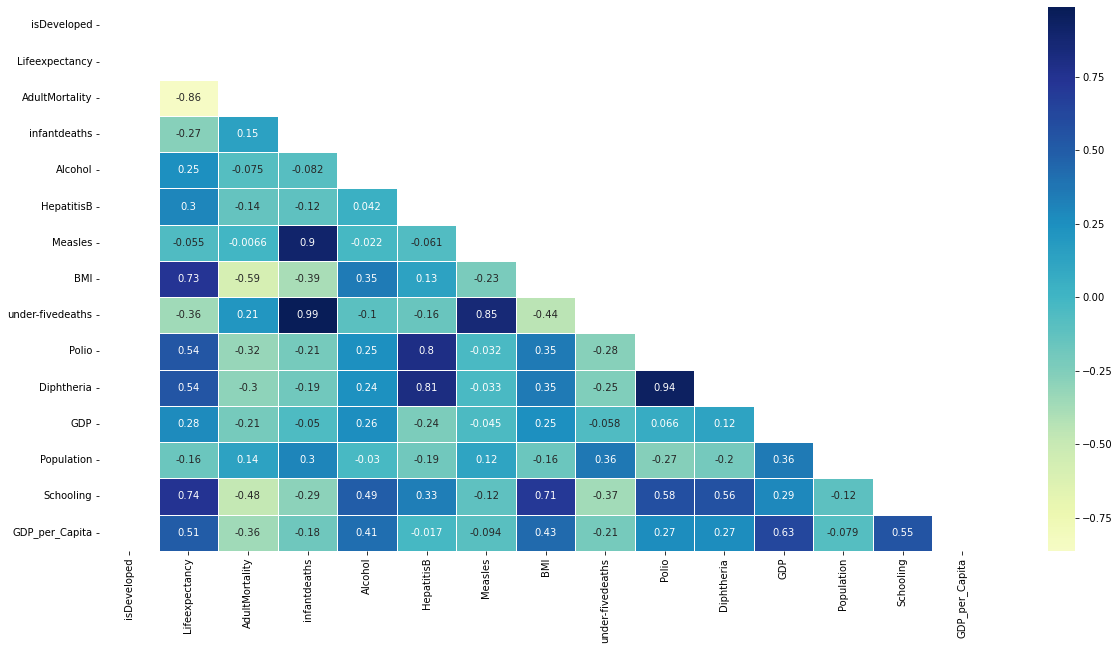

In [143]:
sns.heatmap(posCor1, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask) 
#This the Heatmap of Not Developed correlations from part 4

In [144]:
dfLE.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,414.824126
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,1674.441147
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,2146.263722
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.125,87.3750,2.901137e+09,1.015165e+06,11.78750,2857.799550
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.750,86.8750,2.905302e+11,4.587010e+06,20.03750,63337.610450


In [145]:
print("For developing countries life expectancy vs Schooling - Corr:", thinkstats2.Corr(tmp1_Not_Dev["Lifeexpectancy"], tmp1_Not_Dev["Schooling"]), "SpearmanCorr:",thinkstats2.SpearmanCorr(tmp1_Not_Dev["Lifeexpectancy"], tmp1_Not_Dev["Schooling"]))
print("For developing countries life expectancy vs BMI - Corr:", thinkstats2.Corr(tmp1_Not_Dev["Lifeexpectancy"], tmp1_Not_Dev["BMI"]), "SpearmanCorr:",thinkstats2.SpearmanCorr(tmp1_Not_Dev["Lifeexpectancy"], tmp1_Not_Dev["BMI"]))
print("For developing countries life expectancy vs AdultMortality - Corr:", thinkstats2.Corr(tmp1_Not_Dev["Lifeexpectancy"], tmp1_Not_Dev["AdultMortality"]), "SpearmanCorr:",thinkstats2.SpearmanCorr(tmp1_Not_Dev["Lifeexpectancy"], tmp1_Not_Dev["AdultMortality"]))

For developing countries life expectancy vs Schooling - Corr: 0.7374406555661381 SpearmanCorr: 0.7754307871240752
For developing countries life expectancy vs BMI - Corr: 0.7278649181061169 SpearmanCorr: 0.7242256586888505
For developing countries life expectancy vs AdultMortality - Corr: -0.861398104144783 SpearmanCorr: -0.8925633138468491


<AxesSubplot:>

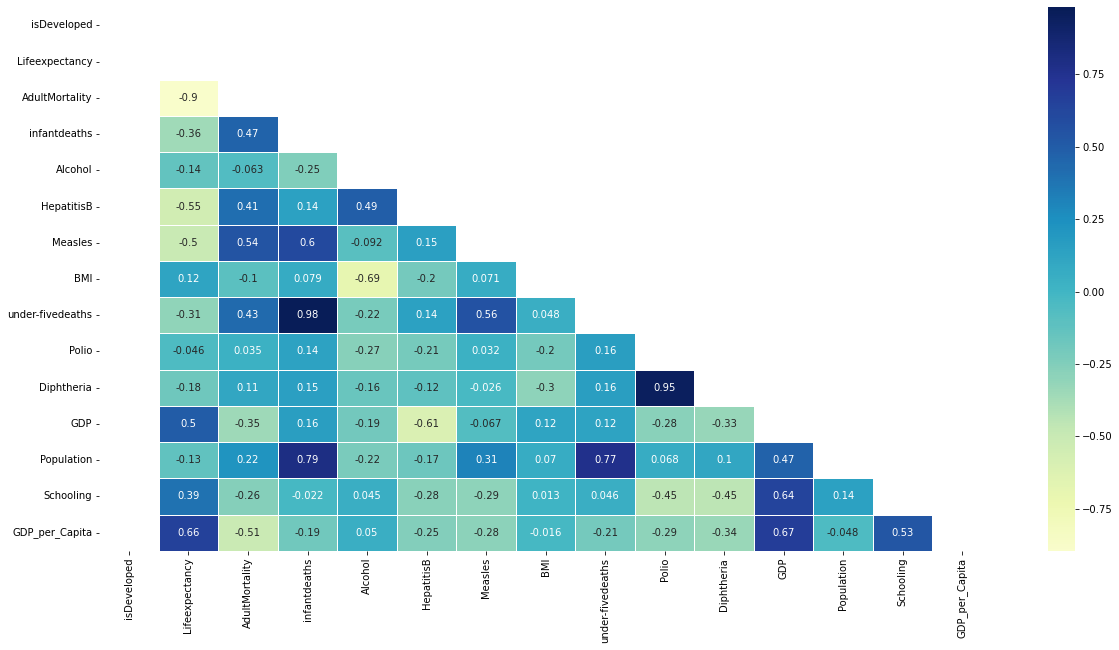

In [146]:
sns.heatmap(posCor2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask) 
#This the Heatmap of Developed correlations from part 4

In [147]:
print("For developed countries life expectancy vs Schooling - Corr:", thinkstats2.Corr(tmp2_Dev["Lifeexpectancy"], tmp2_Dev["Schooling"]), "SpearmanCorr:",thinkstats2.SpearmanCorr(tmp2_Dev["Lifeexpectancy"], tmp2_Dev["Schooling"]))
print("For developed countries life expectancy vs GDP_per_Capita - Corr:", thinkstats2.Corr(tmp2_Dev["Lifeexpectancy"], tmp2_Dev["GDP_per_Capita"]), "SpearmanCorr:",thinkstats2.SpearmanCorr(tmp2_Dev["Lifeexpectancy"], tmp2_Dev["GDP_per_Capita"]))
print("For developed countries life expectancy vs AdultMortality - Corr:", thinkstats2.Corr(tmp2_Dev["Lifeexpectancy"], tmp2_Dev["AdultMortality"]), "SpearmanCorr:",thinkstats2.SpearmanCorr(tmp2_Dev["Lifeexpectancy"], tmp2_Dev["AdultMortality"]))

For developed countries life expectancy vs Schooling - Corr: 0.3922415828752385 SpearmanCorr: 0.35
For developed countries life expectancy vs GDP_per_Capita - Corr: 0.6574576911608628 SpearmanCorr: 0.7382352941176471
For developed countries life expectancy vs AdultMortality - Corr: -0.8954642037228954 SpearmanCorr: -0.6823529411764706


#2 10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?

Yes, I believe they appear to be supported by reality and any are causal. This indicates that the high GDP per capita and good education in developed countries have more funds available per capita, and at the social level, the funds invested in maintaining social stability, ensuring food security, and medical perfection are higher than in developing countries, making the overall population life expectancy higher than in developing countries. At the individual level, developed countries have higher support for personal life and good education, which makes people have common sense about balanced food, and regular medical checkups, which help to extend life expectancy than developing countries.

#3 <li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

In [148]:
posCor2.head()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
isDeveloped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifeexpectancy,NaN,1.000000,-0.895464,-0.355082,-0.137372,-0.554767,-0.504156,0.116580,-0.305577,-0.046351,-0.177003,0.503553,-0.125482,0.392242,0.657458
AdultMortality,NaN,-0.895464,1.000000,0.466766,-0.062626,0.409507,0.544127,-0.102419,0.427138,0.034712,0.106566,-0.349524,0.223078,-0.264064,-0.507213
infantdeaths,NaN,-0.355082,0.466766,1.000000,-0.249324,0.139446,0.602509,0.079268,0.981918,0.136167,0.145919,0.157578,0.794520,-0.021541,-0.190551
Alcohol,NaN,-0.137372,-0.062626,-0.249324,1.000000,0.490067,-0.091567,-0.691422,-0.218711,-0.265080,-0.161648,-0.194397,-0.223828,0.044549,0.050365


In [149]:
dfDiff_life = np.abs(abs(posCor2["Lifeexpectancy"]) - abs(posCor1["Lifeexpectancy"]))
dfDiff_life.sort_values()

Lifeexpectancy      0.000000
AdultMortality      0.034066
Population          0.038486
under-fivedeaths    0.051549
infantdeaths        0.083091
Alcohol             0.112566
GDP_per_Capita      0.149840
GDP                 0.225285
HepatitisB          0.255108
Schooling           0.345199
Diphtheria          0.366797
Measles             0.448984
Polio               0.490881
BMI                 0.611285
isDeveloped              NaN
Name: Lifeexpectancy, dtype: float64

There are 2 places where developing and developed countries have a substantially different relationships with respect to life expectancy, whcih are 'BMI' and 'Polio'.
The **BMI** indicator is a good visual indicator of a person's physical condition, and nutritional intake. Many people in developing countries suffer from food shortages.'The majority of people suffering from extreme hunger are living in developing countries!'(https://www.worldvision.ca/stories/food/world-hunger-facts-how-to-help#:~:text=Poverty%20is%20the%20principal%20cause,gain%20access%20to%20nutritious%20food.).But in developed countries it makes the opposite, in the United States, for example 'The US obesity prevalence was 41.9% in 2017 – March 2020.'(https://www.cdc.gov/obesity/data/adult.html).These 2 factors contribute to the huge differences in IMB indicators between developing and developed countries.So the death rate correlations with 'BMI' in developing countries is much higher than in developed countries.
The **Polio** is transmitted through contact with the feces of an infected person or by ingesting contaminated water, food and drink. People who live in communities with poor hygiene and sanitation have an elevated risk of infection.(https://www.international.gc.ca/world-monde/issues_development-enjeux_developpement/global_health-sante_mondiale/polio.aspx?lang=eng).Developed countries have robust medical systems and even more so Polio vaccines to protect the population. On the other hand, in developing countries where the medical system is poor and backward, people are not given vaccines.So the death rate correlations with 'Polio' in developing countries is much higher than in developed countries.